<a href="https://colab.research.google.com/github/uteThAn/BaitapAI/blob/main/Face_id1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array


In [ ]:
img=image.load_img("/content/drive/MyDrive/AI/Face_id1/train/notme/24.jpg")

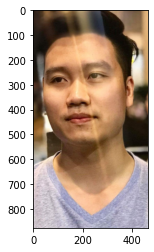

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/AI/Face_id1/train/notme/24.jpg").shape

(877, 462, 3)

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)


In [ ]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/AI/Face_id1/train',
                                      target_size = (150,150),
                                       batch_size = 12,  #sohatgao1muong
                                       class_mode = 'binary') #nhi phan 0 va 1

Found 100 images belonging to 2 classes.


In [ ]:
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/AI/Face_id1/validation',
                                      target_size = (150,150),
                                       batch_size = 12,  #sohatgao1muong
                                       class_mode = 'binary') #nhi phan 0 va 1

Found 20 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'me': 0, 'notme': 1}

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode="min",restore_best_weights=True)
model=tf.keras.Sequential([
    
    tf.keras.layers.Dense(256,activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 150, 150, 256)     1024      
                                                                 
 dense_44 (Dense)            (None, 150, 150, 256)     65792     
                                                                 
 dense_45 (Dense)            (None, 150, 150, 128)     32896     
                                                                 
 dense_46 (Dense)            (None, 150, 150, 128)     16512     
                                                                 
 flatten_8 (Flatten)         (None, 2880000)           0         
                                                                 
 dense_47 (Dense)            (None, 64)                184320064 
                                                                 
 dense_48 (Dense)            (None, 1)                

In [ ]:
#compile
model.compile(loss='binary_crossentropy',        
              optimizer = RMSprop(lr=0.001),
              metrics=['accuracy']
              )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:

history = model.fit(train_dataset,batch_size=12,epochs=50,verbose=1,validation_data=validation_dataset,callbacks=[callback])
model.save('/content/drive/MyDrive/AI/faceid1')

Epoch 1/50
9/9 [==============================] - 39s 4s/step - loss: 19.7455 - accuracy: 0.6100 - val_loss: 4.2924 - val_accuracy: 0.5000
Epoch 2/50
9/9 [==============================] - 37s 4s/step - loss: 3.2946 - accuracy: 0.7200 - val_loss: 0.2527 - val_accuracy: 0.8500
Epoch 3/50
9/9 [==============================] - 37s 4s/step - loss: 0.0734 - accuracy: 0.9700 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 4/50
9/9 [==============================] - 37s 4s/step - loss: 0.0149 - accuracy: 0.9900 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 5/50
9/9 [==============================] - 37s 4s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 6/50
9/9 [==============================] - 36s 4s/step - loss: 5.5560e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/50
9/9 [==============================] - 42s 5s/step - loss: 0.9610 - accuracy: 0.9300 - val_loss: 6.4708 - val_accuracy: 0.5000
Epoch 8/50
9/9 [=============

In [ ]:
#danh gia val
score=model.evaluate(validation_dataset,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

2/2 [==============================] - 3s 901ms/step - loss: 2.8342e-07 - accuracy: 1.0000
test loss =  2.834174779309251e-07
test accuracy =  1.0


In [ ]:
#model.save('/content/drive/MyDrive/AI/face1.h5')

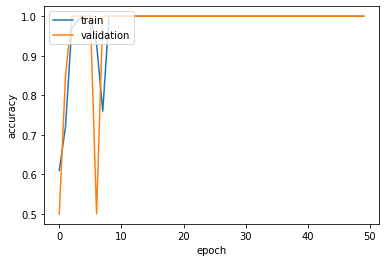

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

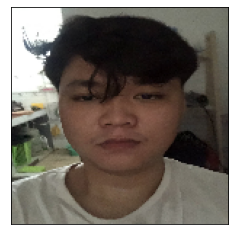

Hi Ann


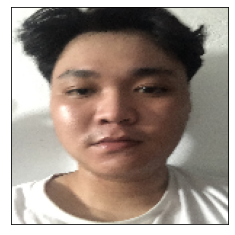

Not Ann


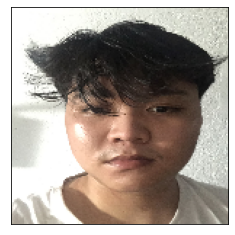

Hi Ann


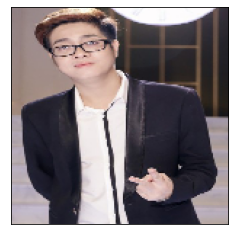

Not Ann


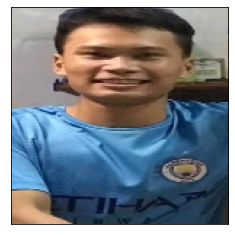

Not Ann


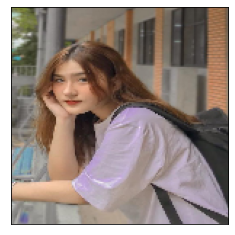

Not Ann


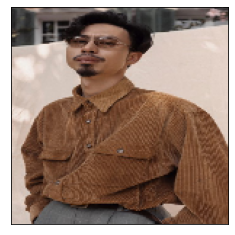

Not Ann


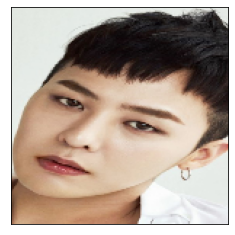

Not Ann


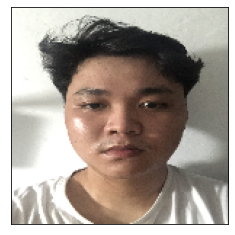

Hi Ann


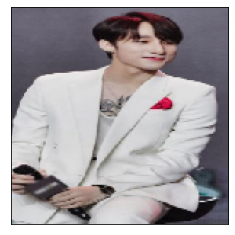

Not Ann


In [ ]:

dir = '/content/drive/MyDrive/AI/Face_id1/test'
for i in os.listdir(dir):
  img = load_img(dir +'//'+ i, target_size=(150,150))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  plt.show()
  x= img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  val=model.predict(images)
 
  if val == 0:
    print("Hi Ann")
  else:
    print("Not Ann")
